#   REPORT for Part B: Logistic Regression

The breast cancer datasets is used to predict the likelihood of a woman getting breast cancer dependent on various criteria. With this machine language structure, a logistic regression was used to obtin a prediction. The structure utilizes various logistic fucntions from sigmoid, hypothesis to log likelihood. These are used to plot the points of the data into a bound real function that is defined for all real input values and has no non negative derivaives. this allows us to get only a positive (1) or a negtive(0) and nothig in between, which maks it easy to account for any false negatives and positives. 

### Importing the standard libraries and breast cancer dataset

The y value was reshaped in order to make a column vector

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import sklearn
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset to a python variable cancer
# Store target to a variable called y
# Store feature to a variable called X

breast_data = load_breast_cancer()

X = breast_data.data
y = breast_data.target
y = y.reshape(-1,1)# shapes y into a 569,1 matrix which helps with operations and calculations

In [3]:
# Printing the shape of data (X) and target (Y) values 

print(X.shape)
print(y.shape) 

(569, 30)
(569, 1)


### Data Pre-Processing

#### Splitting the data into train and test before scaling the dataset and then caling it as gradient ascent will be used

In [4]:
# Use train_test_split() function to split the dataset
# Store the return value of previous step to X_train, X_test, y_train, y_test

#using the train test split function to have a 75/25 split for the train and test subsets respectively and divided into X and y columns 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
# Find the scaler of the dataset by using preprocessing.StandardScaler().fit()
# Using this scale to scale the X_train and X_test using .transform()

#dataset used was X and it correlates to the data in the breast 
scaler=preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# TODO - Print the shape of x_train and y_train 
# print(X_train.shape) # It should print (426, 30)
# print(y_train.shape) # It should print (426,)
print(X_train.shape)
print(y_train.shape)

(426, 30)
(426, 1)


#### Adding a column of ones to the  matrices $X_{train}$ and  $X_{test}$
After adding a column of ones $X_{train}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$

Similarly for $X_{test}$

Populating the first column of the X train dataset with ones in order to match the hypothesis fucntion that consists of the first w coefficient being multiplied by one at all times     

In [7]:
# Append a column of ones to x_train 

# Create a column vector of ones by using np.ones and reshape
# Append a column of ones in the beginning of x_train by using np.hstack

ones = np.ones(X_train.shape[0])#creates a single row that consists of 426 ones
ones = ones.reshape(X_train.shape[0],1)#reshapes that row into individual column vector


X_train = np.hstack((ones, X_train))#appends the column vector to the X_train dataset, resulting in 31 columns and a 1 being added to the beginning of each row


# Now do the same for the test data
one = np.ones(X_test.shape[0])#creates a single row that consists of 143 ones
one = one.reshape(X_test.shape[0],1)#reshapes that row into individual column vector


X_test = np.hstack((one, X_test))#appends the column vector to the X_test dataset, resulting in 31 columns and a 1 being added to the beginning of each row

# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The trainng data has dimensions: ", X_train.shape, ". The testing data has dimensions: ", X_test.shape)
# Looking at the first two rows of X_train to check everything worked as expected
print(X_train[0:2])

The trainng data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -0.4606494  -1.51921209 -0.52895827 -0.49132968 -1.5747797
  -1.21976641 -1.01947749 -0.95551312 -0.71640584 -0.37884191 -0.27283509
   0.49013027 -0.36765    -0.35401257  1.10534093 -0.86108372 -0.79277011
  -0.61933335  0.97464049  0.3585407  -0.62632899 -1.54014551 -0.7068611
  -0.59956596 -1.61844737 -1.2104119  -1.20825122 -1.33723288 -1.01450733
  -0.73276768]
 [ 1.         -0.01459724 -0.85209193 -0.08180982 -0.12192181 -1.15730174
  -0.92226774 -0.84653678 -0.56644964 -0.80546441 -0.9794459  -0.68456535
  -1.04066819 -0.61931202 -0.47989779 -0.71264698 -0.90523397 -0.70640286
  -0.16382774 -1.08691951 -0.63030571 -0.26629784 -1.04993928 -0.30316885
  -0.32284398 -1.22897135 -0.9716658  -0.9889906  -0.48789496 -1.25396625
  -0.90175967]]


In [8]:
# Printing the names of all the features
print(breast_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


##    Implemeting the sigmoid, hypothesis and log likelihood functions 

The sigmoid fuction consists of taking the column vector given and plotting unto the bounded fucntion which will result in getting points that are either positive or negative

### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

The hypothesis fucntion includes making the X train data into a column verctor by multiplying it with w coefficients

### Our hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

The log likelihood fuction consists of determing the likelihood that someone will have breast cancer by using the hypothesis and sigmoid fucntions. 

### Log-Likelihood Function.
Write the code to calculate the log likelihood function $\ell({\bf w})=\frac{1}{m}
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$ where m is the number of examples in the X train dataset

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [9]:
# Write the sigmoid function
#sigmoid function taken from project 1 lab slides
#sigmoid function = [1/1+e^-z_1.....1/1+e^-z_N']^T for each

def sigmoid(z):
    return 1/(1 + np.exp(-z)) #returns column vector where each row is populated with 1/1+e^-z_N' 

In [10]:
# Initialize w using np.zeros()
#w = np.zeros((X_train.shape[1], 1))#creates a single row that consists of 31 zeros
# w = w.reshape(X_train.shape[1],1)#reshapes that row into individual column vector


In [11]:
# Predict the probability that a patient has cancer 
# Write the hypothesis function
#hypothesis function taken from project 1 slides
#hypithesis fucntion = [h(x)^1,....,h(x)^N'] where h(x) = [1/1+e^-(w^0.1,w^1.x^1....w^d.x^d)]

def hypothesis(X , w):
    v = np.matmul(X, w)# matrix multiplication that will result in a column vector with each cell containing the summation of w^0.1,w^1.x^1....w^d.x^d
    return sigmoid(v)


In [12]:
# Write the log likelihood function
#log likelihood function taken from project 1 slides and cost function taken from lecture 003 slides
#log likelihood function l(w) = [y^i.(ln(h(x^i)))+ 1-y^i.(ln(1-h(x^i)))]^1+ ...+ [y^i.(ln(h(x^i)))+ 1-y^i.(ln(1-h(x^i)))]^N
def log_likelihood(X , y , w ):
    m = X.shape[0]
    h = hypothesis(X, w)#get h(x) of the function from the hypothesis function implemented above 
    
    #w = populate each row of the column vector with y^i.(ln(h(x^i)))+ 1-y^i.(ln(1-h(x^i)))
    
    Lw = (1/m) * np.sum((y*np.log(h))+((1-y)*np.log(1-h))) #get the total summantion of each row to complete the log likehood function
    return Lw

##    Finding the gradient

Using the gradient function given to us in the Lecture 003 slides, the gradient ascent is calculted. w  is intialized as a column vector of zeroes and the hypothesis fucntion is used to find h(x). The gradient of the function is obtained by the dot product of X train data transposed and the difference between the plotted X data (h(x)) and y. this is then dividded by the number of training examples. w is then updated to reflect the difference in the learnigrate and the gradient. A list of every 100th likelihood value is kept 

In [13]:
# TODO - Write the gradient ascent function 

def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    # For every 100 iterations, store the log_likelihood for the current w
    # Initializing log_likelihood to be an empty list 
    log_likelihood_values = []
    
    # Initialize w to be a zero vector of shape x_train.shape[1],1
    w = np.zeros((X_train.shape[1], 1))
#     w = w.reshape(X_train.shape[1],1)
    # Initialize N to the number of training examples
    N = X_train.shape[0]
    
    y = y.reshape(y.shape[0], 1)# shapes y into a 426,1 matrix which helps with operations and calculations
    
    for i in range(num_iters):
        # update the w using formula 
        h = hypothesis(X, w)#get h(x) of the function from the hypothesis function implemented above 
        v = (1/N) * np.dot(X.T, h-y) #calculates the gradient from formula given  through gradient function
        
        w = w - (learning_rate*v) 
        
        # append the log_likelihood values to the list for every 100 iterations
        if (i%100 == 0):
            Lw = log_likelihood(X, y, w) 
            
            log_likelihood_values.append(Lw)
    
    return w, log_likelihood_values

######  The hyperparameters are set and the model is ran with th eregular X train and y train dataset

In [25]:
# Set the learning_rate
learning_rate = 0.5
# Set the num_iters
num_iters = 5000
# Run the Logistic_Regresion_Gradient_Ascent() and store the returned values
w,log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)

print(w)
print("_____________________________________________________\n\n") 
print(log_likelihood_values)

[[-0.3479181 ]
 [-0.26846821]
 [ 0.51657668]
 [-0.16993257]
 [-0.72022694]
 [-0.32745742]
 [ 3.00469581]
 [-1.07415832]
 [-1.71089927]
 [ 0.38429594]
 [ 0.19956861]
 [-3.74768423]
 [ 0.40337874]
 [-0.49274761]
 [-2.96966265]
 [-0.79891418]
 [ 1.10607911]
 [ 1.06976183]
 [-1.25387814]
 [ 0.59692961]
 [ 1.46187475]
 [-1.61670271]
 [-3.19542022]
 [-0.56756563]
 [-2.15085816]
 [-0.1957716 ]
 [ 0.33480951]
 [-2.46646051]
 [-1.89587629]
 [-2.15487182]
 [-1.46952252]]
_____________________________________________________


[-0.24640406747117044, -0.0727033462563158, -0.06415637856559564, -0.05999061973560711, -0.05736644586346294, -0.055507276189742605, -0.0540861152938868, -0.05293830956490462, -0.05197351157264211, -0.0511386777401165, -0.0504006213689146, -0.049737395297107544, -0.04913380559651238, -0.04857893250782669, -0.0480646814543665, -0.04758489397826201, -0.04713477933216217, -0.04671053817129714, -0.04630910588052647, -0.04592797295181272, -0.04556505646011527, -0.045218606305849

######   Plotting Likelihood v/s Number of Iterations get a visual representaion of the predictions 

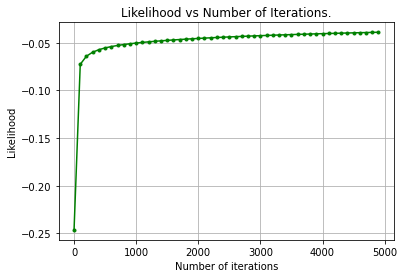

In [26]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,100))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

##  Evaluating your model

Getting the predicted values of the X test dataset using the hypothsesis function and then evaluating the accuracy of the model by calculating the frequecy of slas positives and negatives and true positives and negatives. This is done by comparing thevalue of the y test data set and seeing whether it is positive (1) or negative(0) and then using the prdicted value to see whether it is larger than (positive) or smaller(negative) than 0.5. If they are the same then it is true, else ti is false. Afterwards the precision (The % of correctly predicted sample among all the samples that predicted 1), recall (The % of correctly predicted sample among all the samples that are actually 1) and f1 scale (A measure that combines precisionand recall).

In [27]:
# use hypothesis(...) to predict.
    
pred_y = hypothesis(X_test, w)

In [28]:
#using confusion matrix information and equations given in project 1 slides
TP=0
FP=0
FN=0
TN=0

for i in range(y_test.shape[0]):
    # count TP,FP,FN,FP
    if y_test[i] == 1: #test values are either 0 and 1, where 1 is positive and 0 is negative
        if (pred_y[i] < 0.5) :#if the predicted value is less than 0.5 closer to 0 than to 1 then this is a false postive based on project 1 slides
            FP+=1
        else:
            TP+=1
    if y_test[i] == 0: 
        if (pred_y[i] < 0.5) :#if the predicted value is less than 0.5 closer to 0 than to 1 then this is a true negative based on project 1 slides
            TN+=1
        else:
            FN+=1
            
# calculate precision, recall and f1
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = 2*((precision*recall) / (precision + recall))

print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ",f1)
print("Confusion Matrix: ")
print("TP: ",TP," FN: ",FN," FP: ",FP," TN: ",TN)

Precision:  0.9767441860465116
Recall:  0.9767441860465116
F1:  0.9767441860465116
Confusion Matrix: 
TP:  84  FN:  2  FP:  2  TN:  55
